<a href="https://colab.research.google.com/github/sagar9926/Pytorch/blob/master/Pytorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [4]:
import torchvision
import torchvision.transforms as transforms

# Cifar is divided into 5 training batches and one test batches
trainset = torchvision.datasets.CIFAR10(root = './data',train = True  # yes i want to train this data
                                        ,download = True # yes i want to download it locally
                                        , transform=transforms.ToTensor())# apllying certain functions to the data at downlading step itself... Transform to tensor

                    

# .datasets hesl us to work with the images in aggregated format instead in form pof different bactes of 10k images each

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
#Once we have dataset created locally we can load data from it in certain batchsizes e.g in our case batchsize is 4 
# which means every time i load i will get a batch of 4 images randomlly or sequentially based on shuffle

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [9]:
# To access the train loader we have to c reate a iterator for that

dataiter = iter(trainloader)
images, labels = dataiter.next() # this gives us one instance of four images and their corresponding labels

print(images.shape) #[(Batch size, channels, size of image)]

print(images[1].shape)
print(labels[1].item())


torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
7


## Visualise data

In [11]:
img = images[1]
print(type(img),img.shape)

<class 'torch.Tensor'> torch.Size([3, 32, 32])


In [12]:
# To plot the image first convert the image tensor to numpy

np_img = img.numpy()
print(np_img.shape)

(3, 32, 32)


In [13]:
# To plot the image we need to transpose the image , permute the dimension
# To be able to plot it we need it to be in the form of x,y,z where x and y correspond to the size of the image and z denotes the number of channels

np_img = np.transpose(np_img,(1,2,0))
print(np_img.shape)

(32, 32, 3)


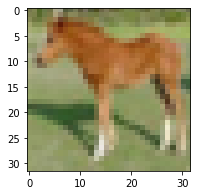

In [18]:
plt.figure(figsize = (3,3))
plt.imshow(np_img) # to plot image using matplotlib
plt.show() #32 x 32 image

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize = (10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [23]:
torchvision.utils.make_grid(images).shape # This represents the stacked images of the batch with 2 pixel padding (32* 4 + 2*5(black borders) = 138)


torch.Size([3, 36, 138])

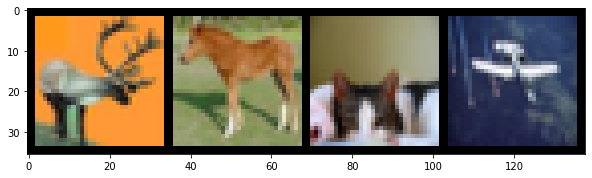

deer horse cat plane


In [27]:
imshow(torchvision.utils.make_grid(images)) #To plot the entire batch, stacks up the images in form of long image in which individual image will apper in cells
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):

  def __init__(self):
    super(FirstCNN,self).__init__() # initialising the super class
    self.conv1 = nn.Conv2d(3, 16, 3)#, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2)) # performing single convolution operation

        
  def forward(self, x):
    x = self.conv1(x)
    return x

In [0]:
net = FirstCNN()

In [36]:
out = net(images)
out.shape #output of first convolution(batchsize,channels,size of output)

torch.Size([4, 16, 30, 30])

In [38]:
# In nn module we can explicitly print parameters as follows

for param in net.parameters():
    print(param.shape) #(16 KERNELS,INPUT 3 CHANNELS, KERNEL SIZE 3x3) # denote weights

    #second output denotes bias , each kernel has one bias this 16 biases

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [40]:
print(out[0, 0, :, :])

tensor([[ 0.2850,  0.2854,  0.2861,  0.2837,  0.2842,  0.2901,  0.2935,  0.2795,
          0.2564,  0.2485,  0.2516,  0.2518,  0.2517,  0.2564,  0.2577,  0.2500,
          0.2187,  0.2308,  0.1933,  0.0319, -0.0230,  0.0829,  0.1774,  0.1866,
          0.1960,  0.2273,  0.2487,  0.2476,  0.2476,  0.2473],
        [ 0.2852,  0.2853,  0.2865,  0.2856,  0.2850,  0.2899,  0.2942,  0.2828,
          0.2593,  0.2498,  0.2527,  0.2530,  0.2523,  0.2569,  0.2501,  0.2511,
          0.2538,  0.0999, -0.0738, -0.0974,  0.0460,  0.1900,  0.1808,  0.1451,
          0.1604,  0.2385,  0.2872,  0.2423,  0.2018,  0.2288],
        [ 0.2851,  0.2855,  0.2868,  0.2852,  0.2843,  0.2903,  0.2942,  0.2824,
          0.2603,  0.2507,  0.2516,  0.2516,  0.2501,  0.2732,  0.2982,  0.2079,
          0.0548, -0.1076, -0.0748,  0.1515,  0.2531,  0.2522,  0.2349,  0.2502,
          0.2408,  0.2818,  0.2922,  0.1849,  0.1542,  0.2098],
        [ 0.2851,  0.2855,  0.2868,  0.2852,  0.2843,  0.2903,  0.2942,  0.2824

In [41]:
print(out[0, 0, :, :].detach())

tensor([[ 0.2850,  0.2854,  0.2861,  0.2837,  0.2842,  0.2901,  0.2935,  0.2795,
          0.2564,  0.2485,  0.2516,  0.2518,  0.2517,  0.2564,  0.2577,  0.2500,
          0.2187,  0.2308,  0.1933,  0.0319, -0.0230,  0.0829,  0.1774,  0.1866,
          0.1960,  0.2273,  0.2487,  0.2476,  0.2476,  0.2473],
        [ 0.2852,  0.2853,  0.2865,  0.2856,  0.2850,  0.2899,  0.2942,  0.2828,
          0.2593,  0.2498,  0.2527,  0.2530,  0.2523,  0.2569,  0.2501,  0.2511,
          0.2538,  0.0999, -0.0738, -0.0974,  0.0460,  0.1900,  0.1808,  0.1451,
          0.1604,  0.2385,  0.2872,  0.2423,  0.2018,  0.2288],
        [ 0.2851,  0.2855,  0.2868,  0.2852,  0.2843,  0.2903,  0.2942,  0.2824,
          0.2603,  0.2507,  0.2516,  0.2516,  0.2501,  0.2732,  0.2982,  0.2079,
          0.0548, -0.1076, -0.0748,  0.1515,  0.2531,  0.2522,  0.2349,  0.2502,
          0.2408,  0.2818,  0.2922,  0.1849,  0.1542,  0.2098],
        [ 0.2851,  0.2855,  0.2868,  0.2852,  0.2843,  0.2903,  0.2942,  0.2824

In [0]:
#!pip install torchviz 

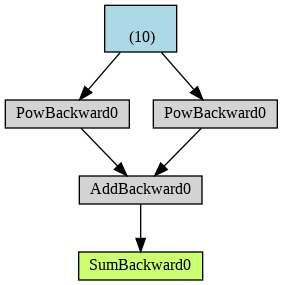

In [60]:
# Explaining the usage of detach
from torchviz import make_dot
x=torch.ones(10, requires_grad=True)

y=x**2
z=x**3
r=(y+z).sum()
make_dot(r).render("attached", format="png")

from IPython.display import Image
Image('attached.png')



In [61]:
r.backward()
x.grad

tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

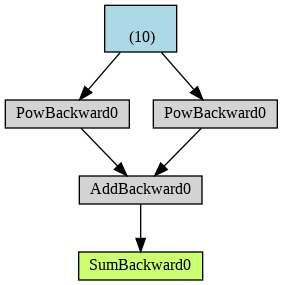

In [62]:
y=x**2
z=x.detach()**3
r1=(y+z).sum()    
make_dot(r).render("detached", format="png")

from IPython.display import Image
Image('detached.png')



In [63]:
x.grad.zero_()
r1.backward()
x.grad

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

### Note that x is detached before being used in computation of z. And this is the graph of this modified fragment:

### detached graph

### As can be seen the branch of computation with x**3 is no longer tracked. This is reflected in the gradient of the result which no longer records the contribution of this branch:


In [39]:
# After applying convolution we got 16 channels of 30x30 lets plot one channel
out1 = out[0, 0, :, :].detach().numpy() # for zeroth batch , take zeroth channel's all 30x30 values 
# To my understanding, detach disables automatic differentiation, i.e stops keeping track of gradients. thus giving just a te nsor which is later converted to numpy

print(out1.shape)

(30, 30)


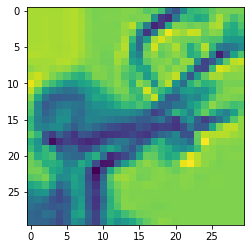

In [64]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()
# Some deer features can be seen

## Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module) :

  def __init__(self):
    super(FirstCNN_v2,self).__init__()

    self.model = nn.Sequential( # N denotes Batch size
        nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
    
  def forward(self, x):
        x = self.model(x)
        return x

In [69]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

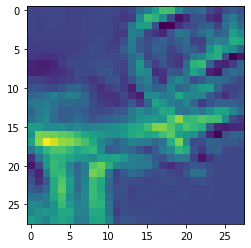

In [70]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [72]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

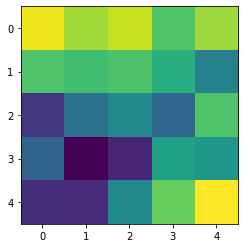

In [73]:
plt.imshow(out[0, 0, :, :].detach().numpy())

##  Training LeNet from Scratch